## Import packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Import data

In [3]:
demographic=pd.read_csv(r"C:\sayan\data science interview\course\Python\projects\Python foundation\Python Foundation Case Study 3 - Insurance Claims Case Study\Case Study 3 - Insurance Claims Case Study\cust_demographics.csv")
claims=pd.read_csv(r"C:\sayan\data science interview\course\Python\projects\Python foundation\Python Foundation Case Study 3 - Insurance Claims Case Study\Case Study 3 - Insurance Claims Case Study\claims.csv")

In [4]:
demographic.sample(5)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
506,89479887,Male,26-Feb-96,MO,527-156-6825,Platinum
210,94041088,Male,16-Jul-90,NM,815-641-3516,Silver
309,84229777,Female,18-Mar-76,TN,728-184-5376,Platinum
891,68709394,Female,23-Sep-66,ID,461-259-2635,Silver
764,11982382,Male,14-Mar-88,OH,439-628-2835,Gold


In [5]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


In [6]:
claims.sample(5)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
948,834460,12826843,Crime,10/24/2017,Home,Unknown,Material only,$1340,1.0,No
938,57309481,16859101,Other driver error,04/18/2017,Auto,Unknown,Material only,$1970,5.0,No
1045,67344180,72664684,Other causes,07/28/2017,Home,Unknown,Material only,$2590,1.0,No
535,32756328,30864915,Driver error,05/28/2018,Auto,No,Material only,$2440,1.0,No
793,73088898,2121802,Other causes,02/17/2017,Auto,Yes,Material and injury,$32090,1.0,No


In [7]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


### DATA PREPARATION (includes question 2 and 3)

#### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

#### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign

In [8]:
#CHANGING DOB DTYPES IN DEMOGRAPHIC
demographic.DateOfBirth=pd.to_datetime(demographic.DateOfBirth,format='%d-%b-%y')

In [9]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CUST_ID      1085 non-null   int64         
 1   gender       1085 non-null   object        
 2   DateOfBirth  1085 non-null   datetime64[ns]
 3   State        1085 non-null   object        
 4   Contact      1085 non-null   object        
 5   Segment      1085 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 51.0+ KB


In [10]:
#NEED TO FIX THIS YEAR
demographic[demographic.DateOfBirth.apply(lambda x: x.year>2024)]

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
9,33507197,Female,2066-09-09,RI,165-519-4583,Gold
13,21240703,Male,2063-07-22,MD,473-561-2675,Silver
17,63916778,Male,2066-09-07,IL,146-157-4572,Platinum
18,17004138,Female,2065-08-13,WA,436-354-4682,Silver
20,75584003,Female,2067-04-22,OK,723-418-3248,Silver
...,...,...,...,...,...,...
1058,56425562,Female,2063-03-18,GA,823-712-3528,Platinum
1074,87596868,Male,2061-11-18,AZ,573-396-3182,Silver
1077,65208809,Male,2064-04-22,VA,286-128-6132,Platinum
1079,46850495,Male,2062-08-21,NV,761-193-2346,Platinum


In [11]:
def rectify_year(x):
    if x.year>2024:
        return x+pd.DateOffset(years=-100)
    else:
        return x

In [12]:
demographic.DateOfBirth.apply(rectify_year)

0      1979-01-12
1      1970-01-13
2      1984-03-11
3      1986-05-01
4      1977-05-13
          ...    
1080   1981-03-15
1081   1996-07-07
1082   1990-04-11
1083   1964-10-22
1084   1995-07-12
Name: DateOfBirth, Length: 1085, dtype: datetime64[ns]

In [13]:
demographic.DateOfBirth=demographic.DateOfBirth.apply(rectify_year)

In [14]:
demographic[demographic.DateOfBirth.apply(lambda x: x.year>2024)]

,CUST_ID,gender,DateOfBirth,State,Contact,Segment


In [15]:
#RECTIFIED
demographic.iloc[9]

CUST_ID                   33507197
gender                      Female
DateOfBirth    1966-09-09 00:00:00
State                           RI
Contact               165-519-4583
Segment                       Gold
Name: 9, dtype: object

In [16]:
#CHANGING CLAIM AMOUNT DTYPES
claims.claim_amount=claims.claim_amount.str.replace('$','').astype(np.float32)

In [17]:
#CHANGING CLAIM DATE DTYPES
claims.claim_date=pd.to_datetime(claims.claim_date, format='%m/%d/%Y')

In [18]:
#FLOAT64 NOT REQUIRED TO STORE
claims.total_policy_claims=claims.total_policy_claims.astype(np.float16)

In [19]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   int64         
 1   customer_id          1100 non-null   int64         
 2   incident_cause       1100 non-null   object        
 3   claim_date           1100 non-null   datetime64[ns]
 4   claim_area           1100 non-null   object        
 5   police_report        1100 non-null   object        
 6   claim_type           1100 non-null   object        
 7   claim_amount         1035 non-null   float32       
 8   total_policy_claims  1090 non-null   float16       
 9   fraudulent           1100 non-null   object        
dtypes: datetime64[ns](1), float16(1), float32(1), int64(2), object(5)
memory usage: 75.3+ KB


### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.


In [20]:
final_data=pd.merge(left=demographic,right=claims,left_on='CUST_ID',right_on='customer_id')
final_data.drop(columns='customer_id',inplace=True)
final_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No
1081,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No
1082,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No
1083,11256802,Female,1964-10-22,LA,469-345-5617,Silver,12376894,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No


In [21]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1085 non-null   int64         
 1   gender               1085 non-null   object        
 2   DateOfBirth          1085 non-null   datetime64[ns]
 3   State                1085 non-null   object        
 4   Contact              1085 non-null   object        
 5   Segment              1085 non-null   object        
 6   claim_id             1085 non-null   int64         
 7   incident_cause       1085 non-null   object        
 8   claim_date           1085 non-null   datetime64[ns]
 9   claim_area           1085 non-null   object        
 10  police_report        1085 non-null   object        
 11  claim_type           1085 non-null   object        
 12  claim_amount         1020 non-null   float32       
 13  total_policy_claims  1075 non-nul

### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims

In [22]:
final_data.police_report.unique()

array(['No', 'Unknown', 'Yes'], dtype=object)

In [23]:
final_data.police_report=np.where(final_data.police_report=='Yes',1,0)

In [24]:
final_data.sample(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
33,80379865,Male,1969-02-27,NM,427-513-8479,Gold,18210740,Natural causes,2018-02-09,Auto,0,Injury only,18580.0,NaN,No
794,30966524,Male,1985-01-31,RI,847-169-5361,Gold,23145140,Natural causes,2018-04-17,Auto,0,Injury only,16870.0,1.0,No
572,62935855,Male,1993-12-16,MD,162-183-8139,Gold,53902980,Other driver error,2017-08-18,Auto,0,Material only,2370.0,1.0,No


### 5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. 
Retain the most recent observation and delete any duplicated records in
the data based on the customer ID column.

In [25]:
#NO DUPLICATE ROW
final_data.duplicated(subset=['CUST_ID','claim_id']).sum()

0

In [26]:
#BASED ON THE QUESTION DROPING THE OLD CLAIMS
final_data.sort_values(by='claim_date', ascending =False,inplace=True,ignore_index=True)

In [27]:
final_data.drop_duplicates(subset='CUST_ID', keep='first', ignore_index=True)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,93915431,Male,1967-09-08,ME,134-785-1687,Gold,99775483,Other causes,2018-10-30,Auto,0,Material and injury,42124.5,1.0,Yes
1,38011078,Female,1976-05-20,NE,271-123-1475,Gold,98795403,Crime,2018-10-30,Auto,0,Material only,1940.0,1.0,No
2,58451506,Male,1968-04-22,FL,673-574-7823,Gold,43042986,Natural causes,2018-10-30,Auto,0,Material only,2420.0,1.0,No
3,46710738,Male,1977-04-28,MO,962-834-9361,Gold,74761374,Driver error,2018-10-30,Auto,0,Material only,1830.0,1.0,No
4,77510822,Female,1986-03-18,AK,436-934-7156,Silver,87329176,Other driver error,2018-10-30,Auto,0,Material only,NaN,2.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,77219712,Female,1999-08-05,NH,649-592-8793,Platinum,61374372,Other causes,2017-01-01,Auto,0,Material and injury,20200.0,1.0,No
1074,42664554,Female,1993-08-13,TN,396-973-2531,Gold,42280334,Other causes,2017-01-01,Auto,0,Injury only,27670.0,1.0,No
1075,64840478,Female,1974-02-14,NM,918-174-7461,Silver,23636125,Other driver error,2017-01-01,Auto,0,Material and injury,17290.0,1.0,No
1076,74155265,Male,1985-11-16,TX,392-739-4873,Gold,25647821,Natural causes,2017-01-01,Auto,0,Material only,2080.0,1.0,No


### 6. Check for missing values and impute the missing values with an appropriate value. 
(mean for continuous and mode for categorical)

In [28]:
final_data.isnull().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64

In [29]:
final_data.total_policy_claims.value_counts()

total_policy_claims
1.0    785
2.0    105
3.0     86
4.0     59
5.0     27
6.0     10
7.0      2
8.0      1
Name: count, dtype: int64

In [30]:
a=final_data.total_policy_claims.mode()
a[0]

1.0

In [31]:
final_data.total_policy_claims.fillna(a[0],inplace=True)

In [32]:
final_data.claim_amount.fillna(final_data.claim_amount.mean(),inplace=True)

In [33]:
final_data.isnull().sum()

CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
dtype: int64

### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria

Children < 18

Youth 18-30

Adult 30-60

Senior > 60


In [34]:
final_data['age']=((final_data.claim_date-final_data.DateOfBirth))
final_data['age']=final_data.age.apply(lambda x: x.days/365.25)
final_data.age

0       51.143053
1       42.444901
2       50.521561
3       41.505818
4       32.618754
          ...    
1080    17.409993
1081    23.386721
1082    42.880219
1083    31.126626
1084    22.442163
Name: age, Length: 1085, dtype: float64

In [35]:
final_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,age
0,93915431,Male,1967-09-08,ME,134-785-1687,Gold,99775483,Other causes,2018-10-30,Auto,0,Material and injury,42124.5,1.0,Yes,51.143053
1,38011078,Female,1976-05-20,NE,271-123-1475,Gold,98795403,Crime,2018-10-30,Auto,0,Material only,1940.0,1.0,No,42.444901


In [36]:
final_data['age_cat']=pd.cut(final_data.age, bins=(0, 18, 30, 60, 100), 
                             labels=['Children < 18', 'Youth 18-30', 'Adult 30-60', 'Senior > 60'])
final_data.sample(5)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,age,age_cat
521,89965541,Male,1967-06-19,MT,359-678-4658,Silver,62487859,Driver error,2017-12-10,Auto,0,Material only,2810.0,1.0,No,50.477755,Adult 30-60
263,62934102,Female,1997-07-25,OR,518-352-6498,Silver,1756485,Other driver error,2018-05-21,Auto,1,Material and injury,39280.0,3.0,No,20.821355,Youth 18-30
175,32269248,Female,1971-06-27,NE,574-857-9387,Gold,94714143,Other driver error,2018-07-07,Auto,1,Injury only,30350.0,1.0,No,47.028063,Adult 30-60
1002,3955265,Male,1977-02-27,IN,324-296-9625,Platinum,30225071,Other causes,2017-02-17,Auto,0,Material and injury,37740.0,1.0,No,39.972621,Adult 30-60
226,6984936,Female,1992-04-21,NM,546-428-8532,Platinum,83283000,Driver error,2018-06-10,Auto,1,Material and injury,25210.0,3.0,No,26.135524,Youth 18-30


In [37]:
final_data.age_cat.value_counts()

age_cat
Adult 30-60      749
Youth 18-30      328
Children < 18      8
Senior > 60        0
Name: count, dtype: int64

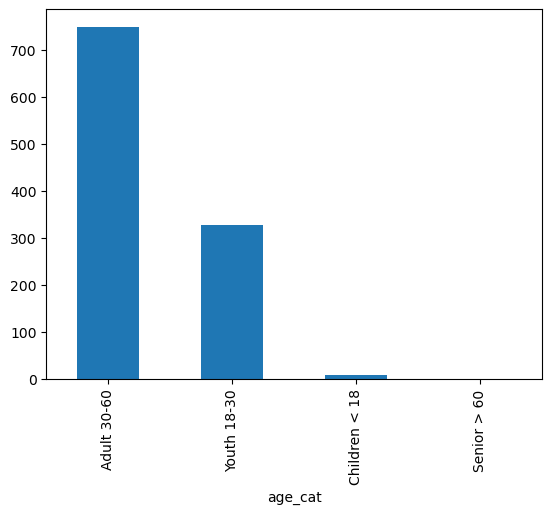

In [38]:
final_data.age_cat.value_counts().plot(kind='bar')
plt.show()

### 8. What is the average amount claimed by the customers from various segments?


In [39]:
final_data.pivot_table(index='Segment',values='claim_amount',aggfunc='mean')

,claim_amount
Segment,
Gold,12829.631836
Platinum,12341.951172
Silver,12208.435547


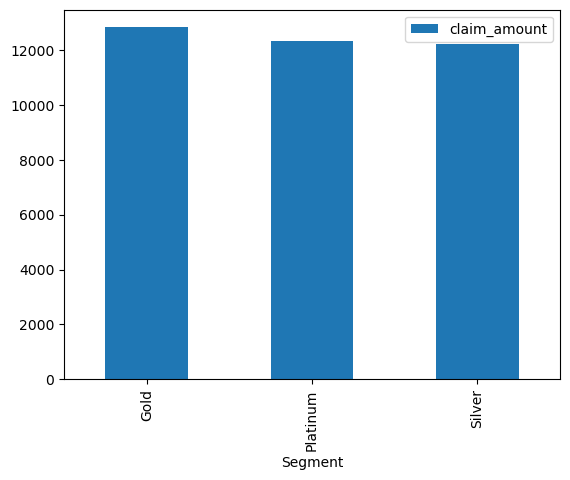

In [40]:
final_data.pivot_table(index='Segment',values='claim_amount',aggfunc='mean').plot(kind='bar')
plt.show()

### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [41]:
a=pd.Timestamp(year=2018,month=10,day=1)
b=a+pd.DateOffset(days=-20)
b

Timestamp('2018-09-11 00:00:00')

In [42]:
final_data[final_data.loc[:,'claim_date']<=b].groupby('incident_cause')['claim_amount'].sum()

incident_cause
Crime                 7.244484e+05
Driver error          3.319952e+06
Natural causes        1.314121e+06
Other causes          3.724985e+06
Other driver error    3.318770e+06
Name: claim_amount, dtype: float32

### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [43]:
final_data.columns

Index(['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'claim_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'age', 'age_cat'],
      dtype='object')

In [44]:
final_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,age,age_cat
0,93915431,Male,1967-09-08,ME,134-785-1687,Gold,99775483,Other causes,2018-10-30,Auto,0,Material and injury,42124.500000,1.0,Yes,51.143053,Adult 30-60
1,38011078,Female,1976-05-20,NE,271-123-1475,Gold,98795403,Crime,2018-10-30,Auto,0,Material only,1940.000000,1.0,No,42.444901,Adult 30-60
2,58451506,Male,1968-04-22,FL,673-574-7823,Gold,43042986,Natural causes,2018-10-30,Auto,0,Material only,2420.000000,1.0,No,50.521561,Adult 30-60
3,46710738,Male,1977-04-28,MO,962-834-9361,Gold,74761374,Driver error,2018-10-30,Auto,0,Material only,1830.000000,1.0,No,41.505818,Adult 30-60
4,77510822,Female,1986-03-18,AK,436-934-7156,Silver,87329176,Other driver error,2018-10-30,Auto,0,Material only,12467.681641,2.0,No,32.618754,Adult 30-60


In [45]:
final_data.incident_cause.value_counts()

incident_cause
Other causes          285
Driver error          261
Other driver error    245
Natural causes        186
Crime                 108
Name: count, dtype: int64

In [46]:
adults=final_data.pivot_table(index=['age_cat','State'],columns='incident_cause',values='claim_id',aggfunc="count")

In [47]:
adults.index

MultiIndex([('Children < 18', 'AK'),
            ('Children < 18', 'AL'),
            ('Children < 18', 'AR'),
            ('Children < 18', 'AZ'),
            ('Children < 18', 'CA'),
            ('Children < 18', 'CO'),
            ('Children < 18', 'CT'),
            ('Children < 18', 'DE'),
            ('Children < 18', 'FL'),
            ('Children < 18', 'GA'),
            ...
            (  'Senior > 60', 'SD'),
            (  'Senior > 60', 'TN'),
            (  'Senior > 60', 'TX'),
            (  'Senior > 60', 'UT'),
            (  'Senior > 60', 'VA'),
            (  'Senior > 60', 'VT'),
            (  'Senior > 60', 'WA'),
            (  'Senior > 60', 'WI'),
            (  'Senior > 60', 'WV'),
            (  'Senior > 60', 'WY')],
           names=['age_cat', 'State'], length=200)

In [48]:
adults.columns

Index(['Crime', 'Driver error', 'Natural causes', 'Other causes',
       'Other driver error'],
      dtype='object', name='incident_cause')

In [49]:
adults.loc[[('Adult 30-60','TX'),('Adult 30-60','DE'),('Adult 30-60','AK')],['Driver error','Other driver error']]

incident_cause     Driver error  Other driver error
age_cat     State                                  
Adult 30-60 TX                3                   3
            DE                4                   5
            AK                6                   3

### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage onthe pie chart.

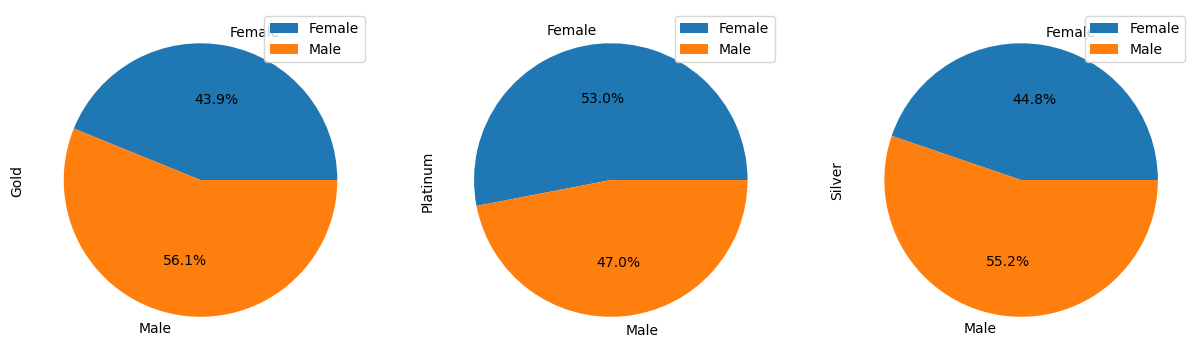

In [50]:
final_data.pivot_table(index='gender',columns='Segment',
                       values='claim_amount',aggfunc='sum').plot(kind='pie',subplots=True,autopct='%.1f%%',figsize=(15,8))
plt.show()

<Figure size 640x480 with 0 Axes>

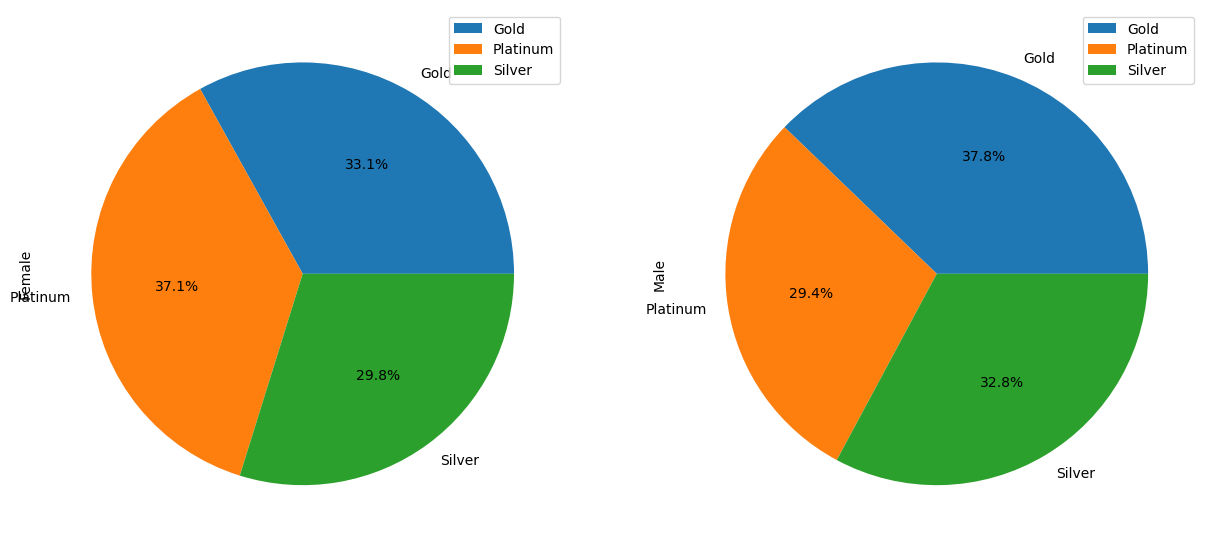

In [51]:
plt.figure(layout='constrained')
final_data.pivot_table(columns='gender',index='Segment',
                       values='claim_amount',aggfunc='sum').plot(kind='pie',subplots=True,autopct='%.1f%%',figsize=(15,10))

plt.show()

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [52]:
sex=final_data.pivot_table(index=['gender'],columns='incident_cause',values='claim_id',aggfunc="count")
sex.iloc[:,[1,4]]

incident_cause,Driver error,Other driver error
gender,,
Female,73,149
Male,188,96


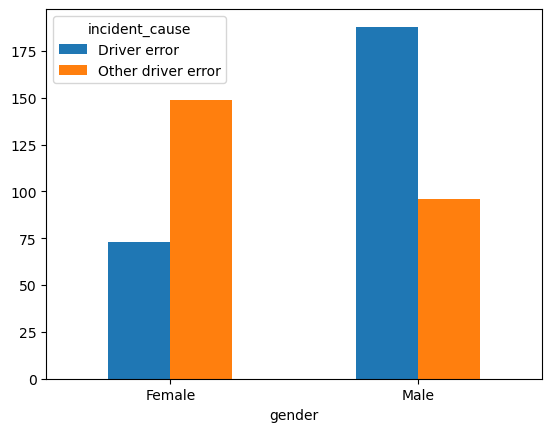

In [53]:
sex.iloc[:,[1,4]].plot(kind='bar',rot=0)
plt.show()

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

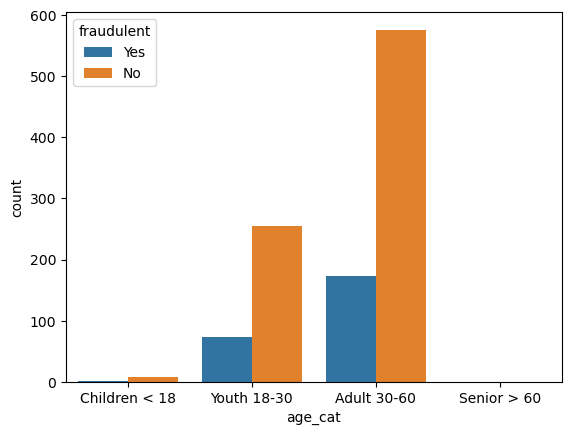

In [54]:
sns.countplot(data=final_data,x='age_cat',hue='fraudulent')
plt.show()

In [55]:
final_data.pivot_table(index='age_cat',columns='fraudulent',values='claim_id',aggfunc="count")

fraudulent,No,Yes
age_cat,,
Children < 18,7,1
Youth 18-30,255,73
Adult 30-60,576,173
Senior > 60,0,0


### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 

In [56]:
final_data['claim_year']=final_data.claim_date.apply(lambda x: x.year)
final_data['claim_month']=final_data.claim_date.apply(lambda x: x.month_name())

In [57]:
final_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,age,age_cat,claim_year,claim_month
0,93915431,Male,1967-09-08,ME,134-785-1687,Gold,99775483,Other causes,2018-10-30,Auto,0,Material and injury,42124.5,1.0,Yes,51.143053,Adult 30-60,2018,October
1,38011078,Female,1976-05-20,NE,271-123-1475,Gold,98795403,Crime,2018-10-30,Auto,0,Material only,1940.0,1.0,No,42.444901,Adult 30-60,2018,October


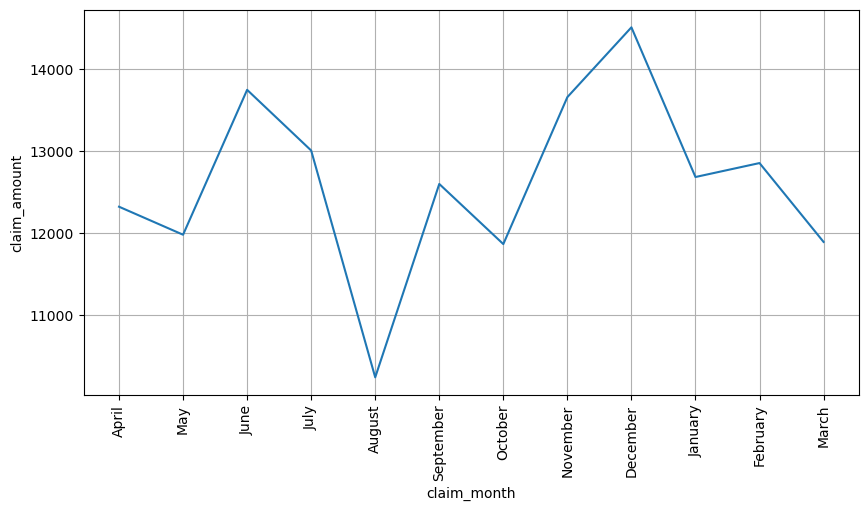

In [58]:
#MONTHS ACCORDING TO FINANCIAL YEAR
plt.figure(figsize=(10,5))
months = ['April','May','June','July', 'August','September', 
          'October','November','December','January', 'February','March']
cat = pd.CategoricalDtype(months, ordered=True)
#considering both the years
sns.lineplot(data=final_data.astype({'claim_month': cat}),x='claim_month',y='claim_amount',errorbar=None)
plt.xticks(rotation=90)
plt.grid()
plt.show()

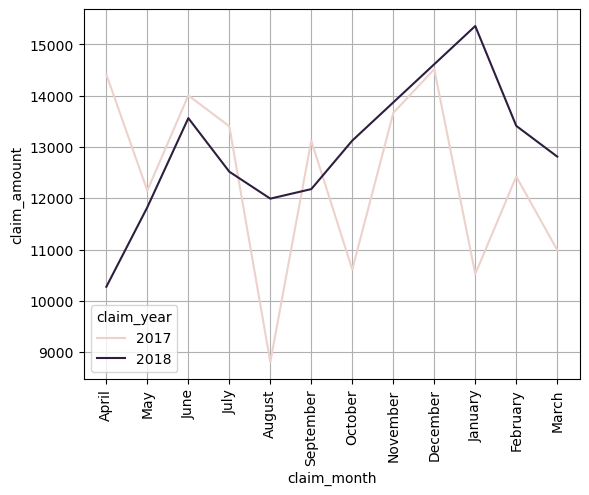

In [59]:
#breaking down into years
sns.lineplot(data=final_data.astype({'claim_month': cat}),x='claim_month',y='claim_amount',errorbar=None,hue='claim_year')
plt.xticks(rotation=90)
plt.grid()
plt.show()

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [60]:
final_data_avg=final_data.groupby(['gender','age_cat','fraudulent'])[['claim_amount']].mean().reset_index()
final_data_avg

,gender,age_cat,fraudulent,claim_amount
0,Female,Children < 18,No,11210.000000
1,Female,Children < 18,Yes,NaN
2,Female,Youth 18-30,No,12390.372070
3,Female,Youth 18-30,Yes,7598.811523
4,Female,Adult 30-60,No,12372.093750
5,Female,Adult 30-60,Yes,12461.895508
6,Female,Senior > 60,No,NaN
7,Female,Senior > 60,Yes,NaN
8,Male,Children < 18,No,18316.000000
9,Male,Children < 18,Yes,32407.000000


C:\Users\SG.SAYANPC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

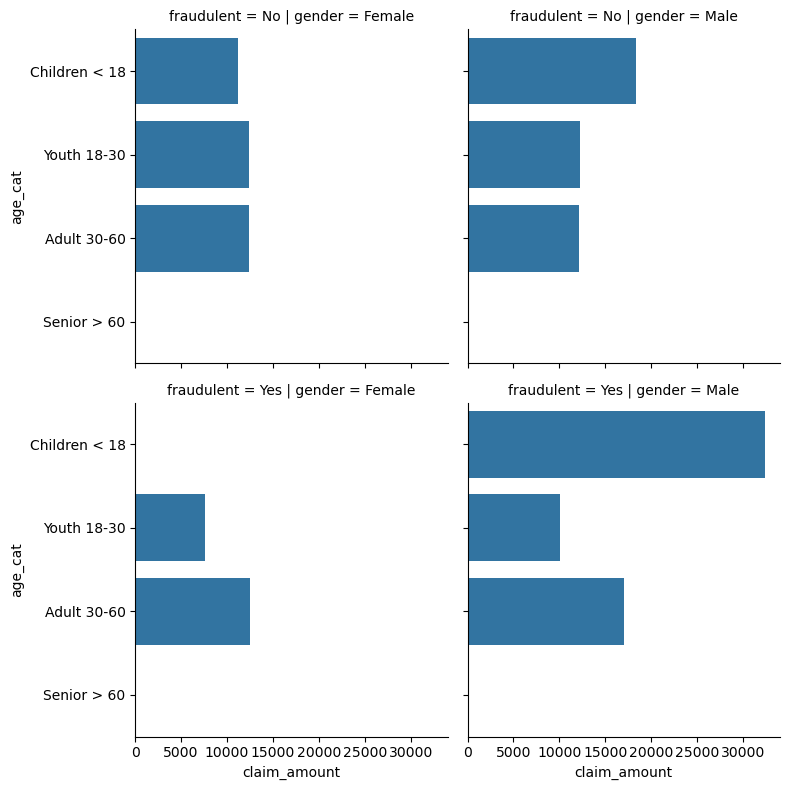

In [61]:
plt.figure(layout='constrained',figsize=(10,10))
MAP=sns.FacetGrid(final_data_avg, row="fraudulent", col="gender",height=4)
MAP.map_dataframe(sns.barplot, "claim_amount","age_cat")


Based on the conclusions from exploratory analysis as well as suitable 
statistical tests, answer the below questions. Please include a detailed 
write-up on the parameters taken into consideration, the Hypothesis 
testing steps, conclusion from the p-values and the business implications of 
the statements. 

### 16. Is there any similarity in the amount claimed by males and females?

In [62]:
#State the Null hypothesis and Alternate hypothesis
#Ho=There is similarity in the amount claimed by males and females (mean_male=mean_female)
#Ha=there is no similarity in the amount claimed by males and females (mean_male<>mean_female)

#CI=95%
#the level of siginificance(p-Value=0.05)

In [63]:
final_data.pivot_table(index='gender',values='claim_amount')

,claim_amount
gender,
Female,12062.634766
Male,12853.058594


In [64]:
claim_amount_male=final_data[final_data.loc[:,'gender']=='Male']['claim_amount']
claim_amount_female=final_data[final_data.loc[:,'gender']=='Female']['claim_amount']

In [65]:
#These are independent samples and continuous. Thus , we need to perform the two tail t-test for independed sample
stats.ttest_ind(claim_amount_male,claim_amount_female)
#SINCE P VALUE IS >0.05,WE FAILED TO REJECT THE NULL HYPOTHESIS

#BUSINESS OUTCOME : There is similarity in usege of male and female

TtestResult(statistic=0.9738150480468969, pvalue=0.33036583274640774, df=1083.0)

### 17. Is there any relationship between age category and segment?


In [66]:
#State the Null hypothesis and Alternate hypothesis
#Ho=There is no relationship between age category and segment
#Ha=There is relationship between age category and segment

#CI=95%
#the level of siginificance(p-Value=0.05)

In [67]:
#We are comparing two categorical datas, so need to use Chi Square Test
contngcy_table=pd.crosstab(index = final_data.age_cat, columns = final_data.Segment)
contngcy_table

Segment,Gold,Platinum,Silver
age_cat,,,
Children < 18,4,4,0
Youth 18-30,106,117,105
Adult 30-60,265,241,243


In [68]:
stats.chi2_contingency(contngcy_table)
#SINCE P VALUE IS >0.05,WE FAILED TO REJECT THE NULL HYPOTHESIS

#BUSINESS OUTCOME : There is no relationship between age category and segment

Chi2ContingencyResult(statistic=5.276713250756647, pvalue=0.26006478076298034, dof=4, expected_freq=array([[  2.76497696,   2.66912442,   2.56589862],
       [113.3640553 , 109.43410138, 105.20184332],
       [258.87096774, 249.89677419, 240.23225806]]))

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [75]:
final_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,age,age_cat,claim_year,claim_month
0,93915431,Male,1967-09-08,ME,134-785-1687,Gold,99775483,Other causes,2018-10-30,Auto,0,Material and injury,42124.5,1.0,Yes,51.143053,Adult 30-60,2018,October
1,38011078,Female,1976-05-20,NE,271-123-1475,Gold,98795403,Crime,2018-10-30,Auto,0,Material only,1940.0,1.0,No,42.444901,Adult 30-60,2018,October


In [82]:
sample_17_18=final_data[(final_data.claim_date>=('2017-04-01')) & (final_data.claim_date<=('2018-03-31'))].claim_amount
sample_17_18.mean()

12948.369

In [ ]:
#State the Null hypothesis and Alternate hypothesis
#Ho= There is no significant rise in the claim amount.
#Ha=There is siginciant rise in the claim amount.

#CI=95%
#the level of siginificance(p-Value=0.05)

In [84]:
#Comparing the mean of two samples
pop_mean=10000
stats.ttest_1samp(sample_17_18, popmean=pop_mean)
#SINCE P VALUE IS <0.05,WE REJECT THE NULL HYPOTHESIS

#BUSINESS OUTCOME : There is siginciant rise in the claim amount in 2017-2018 fiscal year as compared to 2016-17 fiscal year

TtestResult(statistic=5.159250007393531, pvalue=3.420259153688494e-07, df=574)

### 19. Is there any difference between age groups and insurance claims?

In [85]:
final_data.age_cat.value_counts()
#I WILL NEGLECT SENIOR>60 GROUP

age_cat
Adult 30-60      749
Youth 18-30      328
Children < 18      8
Senior > 60        0
Name: count, dtype: int64

In [89]:
#State the Null hypothesis and Alternate hypothesis
#Ho= There is no difference between age groups and insurance claims .
#Ha=There is siginciant difference between age groups and insurance claims .

#CI=95%
#the level of siginificance(p-Value=0.05)

adult=final_data[final_data.loc[:,'age_cat']=='Adult 30-60'].loc[:,'claim_amount']
youth=final_data[final_data.loc[:,'age_cat']=='Youth 18-30'].loc[:,'claim_amount']
children=final_data[final_data.loc[:,'age_cat']=='Children < 18'].loc[:,'claim_amount']

In [90]:
#There are more than two variables. so we will perform the ANOVA/f-Test
stats.f_oneway(adult,youth,children)

#SINCE P VALUE IS >0.05,WE FAILED TO REJECT THE NULL HYPOTHESIS

#BUSINESS OUTCOME : There is no difference between age groups and insurance claims.

F_onewayResult(statistic=1.7347645162644099, pvalue=0.17693212234328473)

### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [ ]:
#State the Null hypothesis and Alternate hypothesis
#Ho= There is no relationship between total number of policy claims and the claimed amount.
#Ha= There is significant relationship between total number of policy claims and the claimed amount.

#CI=95%
#the level of siginificance(p-Value=0.05)

In [91]:
final_data.total_policy_claims

0       1.0
1       1.0
2       1.0
3       1.0
4       2.0
       ... 
1080    1.0
1081    1.0
1082    1.0
1083    1.0
1084    1.0
Name: total_policy_claims, Length: 1085, dtype: float16

In [92]:
final_data.claim_amount

0       42124.500000
1        1940.000000
2        2420.000000
3        1830.000000
4       12467.681641
            ...     
1080    20200.000000
1081    27670.000000
1082    17290.000000
1083     2080.000000
1084    30930.000000
Name: claim_amount, Length: 1085, dtype: float32

In [93]:
#We have two continuous variables, so we will perform Pearson's test
stats.pearsonr(final_data.claim_amount,final_data.total_policy_claims)

#SINCE P VALUE IS >0.05,WE FAILED TO REJECT THE NULL HYPOTHESIS

#BUSINESS OUTCOME :  There is no relationship between total number of policy claims and the claimed amount.

PearsonRResult(statistic=-0.017952953364268578, pvalue=0.5547051236390917)